# Tree-Based Methods













### Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# you need to install graphviz-python from Anaconda, it is not installed by default.
# run this line in the command line: conda install python-graphviz
import graphviz

%matplotlib inline

In [2]:
path='data/'
filename = path+'spamdata.csv'
df1 = pd.read_csv(filename)

In [3]:
df1.head()
#df1.info()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1-Fitting Classification Trees
The sklearn library has a lot of useful tools for constructing classification and regression trees:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score

We'll start by using classification trees to analyze the Spam data set. In order to properly evaluate the performance of a classification tree on the data, we must estimate the test error rather than simply computing the training error. We first split the observations into a training set and a test set:

In [5]:
X = df1.iloc[:,:57]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

We now use the DecisionTreeClassifier() function to fit a classification tree in order to predict Spam. However, we can limit the depth of a tree using the max_depth parameter:

In [6]:
classification_tree_spam = DecisionTreeClassifier(max_depth = 2)
classification_tree_spam.fit(X_train, y_train)
classification_tree_spam.score(X_train, y_train)

0.8611413043478261

We see that the training accuracy is 86.1%. Now, one of the most attractive properties of trees is that they can be graphically displayed. Unfortunately, this is a bit of a roundabout process in sklearn. We use the export_graphviz() function to export the tree structure to a temporary .dot file, and the graphviz.Source() function to display the image:

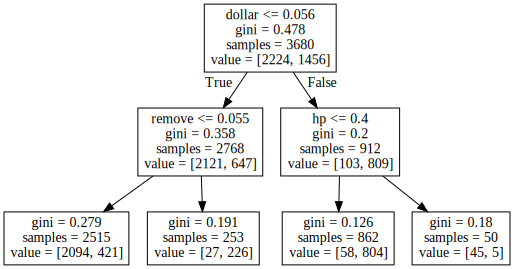

In [7]:
export_graphviz(classification_tree_spam, 
                out_file = "spam_tree.dot", 
                feature_names = X_train.columns)

with open("spam_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The most important indicator of spam emails appears to be the word Dollar.

Finally, let's evaluate the tree's performance on the test data. The predict() function can be used for this purpose. We can then build a confusion matrix, which shows that we are making correct predictions for around 87.8% of the test data set:

In [8]:
pred = classification_tree_spam.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

      No  Yes
No   549   97
Yes   15  260


In [9]:
(549+260)/921

0.8783930510314875

In [10]:
#We can also use accuracy_score function
accuracy_score(y_test, pred)

0.8783930510314875

#### Exercise

Now, let's try different depth of the tree and compare in terms of accuracy on the test set.

In [11]:
dt10 = DecisionTreeClassifier(max_depth=10)
dt11 = DecisionTreeClassifier(max_depth=11)
dt12 = DecisionTreeClassifier(max_depth=12)

# you may play with depth and prune the tree in different levels
dt10.fit(X_train,y_train)
dt11.fit(X_train,y_train)
dt12.fit(X_train,y_train)

y10_pred = dt10.predict(X_test)
y11_pred = dt11.predict(X_test)
y12_pred = dt12.predict(X_test)

accuracy_score(y_test, y10_pred)

0.9218241042345277

In [12]:
accuracy_score(y_test, y11_pred)

0.9185667752442996

In [13]:
accuracy_score(y_test, y12_pred)

0.9218241042345277

### "Cross-Validation" for Depth of the Regression Tree

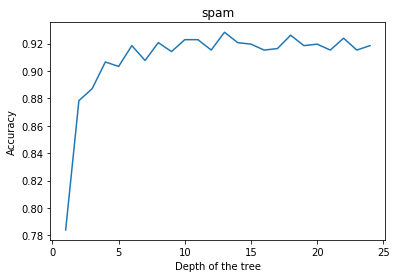

In [14]:
#X = df1.iloc[:,:57]
#y = df1.iloc[:,-1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Initialize the accuracy_score vector
acc = []
depth = np.arange(1, 25)

# Calculate accuracy score on the test set for different depths of the tree
for i in depth:
    # Fit the Regression Tree
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    # Predict on the test set
    y_pred = dt.predict(X_test)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)
    
    acc.append(score)
    
# Plot results    
plt.plot(depth, acc, '-')
plt.xlabel('Depth of the tree')
plt.ylabel('Accuracy')
plt.title('spam');

### Bagging Classifier

In [15]:
#X = df1.iloc[:,:57]
#y = df1.iloc[:,-1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=100, random_state=1)
bag.fit(X_train, y_train)

y_hat = bag.predict(X_test)
accuracy_score(y_test, y_hat)


0.9489685124864278

## 2-Fitting Regression Trees

In [16]:
path='data/'
filename = path+'Auto.csv'
df2 = pd.read_csv(filename, na_values=['?'], na_filter=True)
df2 = df2.dropna() #Removes the whole raw if 1 missing value

In [17]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [18]:
X = df2[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df2['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
regr_tree_auto = DecisionTreeRegressor(max_depth = 2)
regr_tree_auto.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Let's take a look at the tree:

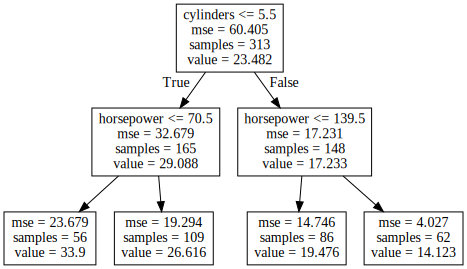

In [20]:
export_graphviz(regr_tree_auto, 
                out_file = "auto_tree.dot", 
                feature_names = X_train.columns)

with open("auto_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Now let's see how it does on the test data:

Text(0,0.5,'y_test')

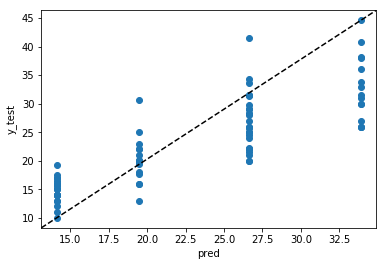

In [21]:
pred = regr_tree_auto.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'mpg')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

In [22]:
mean_squared_error(y_test, pred)

18.956119328538193

#### Exercise

Now, let's try different depth of the tree and compare in terms of accuracy on the test set.

In [30]:
dt10 = DecisionTreeRegressor(max_depth=10)
dt11 = DecisionTreeRegressor(max_depth=11)
dt12 = DecisionTreeRegressor(max_depth=12)

# you may play with depth
dt10.fit(X_train,y_train)
dt11.fit(X_train,y_train)
dt12.fit(X_train,y_train)

y10_pred = dt10.predict(X_test)
y11_pred = dt11.predict(X_test)
y12_pred = dt12.predict(X_test)

mean_squared_error(y_test, y10_pred)

23.595111524904475

In [31]:
mean_squared_error(y_test, y11_pred)

30.717806982358486

In [32]:
mean_squared_error(y_test, y12_pred)

27.24268062024608

### "Cross-Validation" for Depth of the Regression Tree

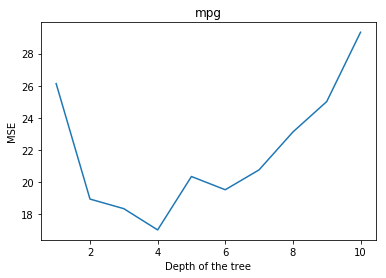

In [33]:
#X = df2[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
#y = df2['mpg']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initialize the MSE vector
mse = []
depth = np.arange(1, 11)

# Calculate MSE on the test set for different depths of the tree
for i in depth:
    # Fit the Regression Tree
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train,y_train)
    # Predict on the test set
    y_pred = dt.predict(X_test)
    # Compute the MSE
    score = mean_squared_error(y_test, y_pred)
    
    mse.append(score)
    
# Plot results    
plt.plot(depth, mse, '-')
plt.xlabel('Depth of the tree')
plt.ylabel('MSE')
plt.title('mpg');

### Bagging Regressor

In [27]:
#X = df2[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
#y = df2['mpg']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(n_estimators=100, random_state=1)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

In [29]:
y_hat = bag.predict(X_test)
mean_squared_error(y_test, y_hat)

12.936096822784817